##### load modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#####

##### load dataset

In [23]:
data = pd.read_csv(r"/Users/melki/Desktop/student_spending (1).csv")
data.head(5)

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


#####

##### find number of columns

In [24]:
data.columns

Index(['Unnamed: 0', 'age', 'gender', 'year_in_school', 'major',
       'monthly_income', 'financial_aid', 'tuition', 'housing', 'food',
       'transportation', 'books_supplies', 'entertainment', 'personal_care',
       'technology', 'health_wellness', 'miscellaneous',
       'preferred_payment_method'],
      dtype='object')

#####

##### finding null columns  

In [25]:
data.isna().sum()

Unnamed: 0                  0
age                         0
gender                      0
year_in_school              0
major                       0
monthly_income              0
financial_aid               0
tuition                     0
housing                     0
food                        0
transportation              0
books_supplies              0
entertainment               0
personal_care               0
technology                  0
health_wellness             0
miscellaneous               0
preferred_payment_method    0
dtype: int64

#####

##### creating the y (dependent variable) for linear regression

In [26]:
data['total_monthly_spending'] = data['housing'] + data['food'] + data['transportation'] + data['books_supplies'] + data['entertainment'] + data['personal_care'] + data['technology'] + data['health_wellness'] + data['miscellaneous']                          


#####

##### show header with new column

In [27]:
data.head(5)

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method,total_monthly_spending
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card,1768
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card,1848
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash,1759
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App,1730
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card,1941


#####

##### create a line plot to compare some of the X values with the y

###### financial aid

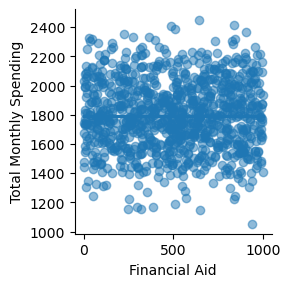

In [28]:
sns.lmplot(x = 'financial_aid', y = 'total_monthly_spending', data = data, scatter_kws = {'alpha':0.5}, height = 3)
plt.xlabel('Financial Aid')
plt.ylabel('Total Monthly Spending')
plt.show()

###### tuition

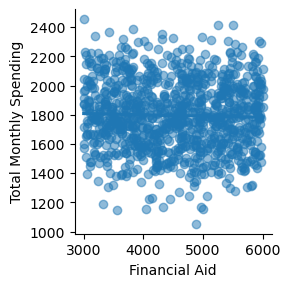

In [29]:
sns.lmplot(x = 'tuition', y = 'total_monthly_spending', data = data, scatter_kws = {'alpha':0.5}, height = 3)
plt.xlabel('Financial Aid')
plt.ylabel('Total Monthly Spending')
plt.show()

#####

##### change gender from categorical to numerical variable

In [30]:
data.gender.unique()

array(['Non-binary', 'Female', 'Male'], dtype=object)

In [31]:
data['gender'] = [0 if value == 'Male' else 1 if value == 'Female' else 2 for value in data['gender']]

In [32]:
data['gender'].unique()

array([2, 1, 0])

#####

##### change year_in_school from categorical to numerical variable

In [33]:
data['year_in_school'].unique()

array(['Freshman', 'Junior', 'Senior', 'Sophomore'], dtype=object)

In [34]:
data['year_in_school'] = [0 if value == 'Freshman' else 1 if value == 'Sophomore' else 2 if value == 'Junior' else 3 for value in data['year_in_school']]

In [35]:
data['year_in_school'].unique()

array([0, 2, 3, 1])

#####

##### change major from categorical to numerical variable

In [37]:
data['major'].unique()

array(['Psychology', 'Economics', 'Computer Science', 'Engineering',
       'Biology'], dtype=object)

In [38]:
data['major'] = [0 if value == 'Psychology' else 1 if value == 'Economics' else 2 if value == 'Computer Science' else 3 for value in data['major']]

In [39]:
data['major'].unique()

array([0, 1, 2, 3])

#####

##### set up X and y variables

In [42]:
X = data[['age', 'gender', 'year_in_school', 'major', 'monthly_income', 'financial_aid', 'tuition']]
y = data['total_monthly_spending']

#####

##### training and test the data with model_selection

In [43]:
from sklearn import model_selection
trainer = model_selection.train_test_split

In [44]:
X_train, X_test, y_train, y_test = trainer(X, y, test_size = 0.2, random_state = 444)

In [46]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

#####

importing linear_model to create linear regression model

In [47]:
from sklearn import linear_model

In [48]:
model = linear_model.LinearRegression()

#####

##### training the model, finding intercept, r-score, and coefficients

In [49]:
model.fit(X_train, y_train)

LinearRegression()

In [50]:
model.intercept_

1695.3160530577081

##### *the intercept suggests that when the X values (age, gender, year, income, major, financial aid are all 0, the expected total monthly spending would be $1695.00*

In [51]:
model.score(X_train, y_train)

0.004905351219317344

##### *the r-square value is poorly low suggestign there may not be a relationship between the X and y values*

#####

##### making predictions with X test

In [54]:
predictions = model.predict(X_test)

#####

##### using scatterplot to compare predictions and actual values to see if there is a relationship 

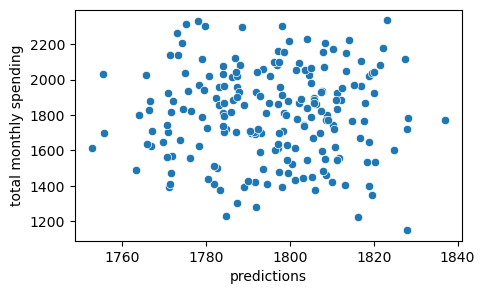

In [59]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = predictions, y = y_test)
plt.xlabel('predictions')
plt.ylabel('total monthly spending')
plt.show()

##### *there does not seem to be a relationship*

#####

##### evaluating the model using metrics

from sklearn import metrics
import math

In [61]:
mse = metrics.mean_squared_error
mae = metrics.mean_absolute_error

In [63]:
print('the mean squared error of the model is ', mse(y_test, predictions))
print('the mean absolute error of the model is ', mae(y_test, predictions))
print('the root mean squared error of the model is ', math.sqrt(mse(y_test, predictions)))

the mean squared error of the model is  66370.21681852239
the mean absolute error of the model is  212.49791042241216
the root mean squared error of the model is  257.62417747277215


##### 

##### time to find the residuals of the data
##### residuals = actual values - predictions

In [64]:
residuals = y_test - predictions

#####

##### plotting residuals to see if they are normally distributed using hisplot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


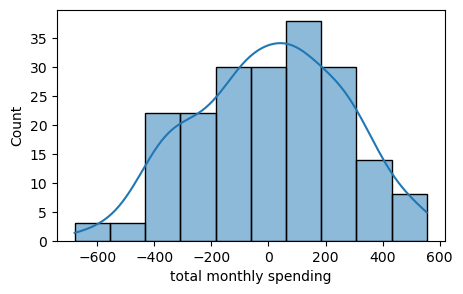

In [69]:
plt.figure(figsize = (5,3))
sns.histplot(residuals, kde = True)
plt.xlabel('total monthly spending')
plt.show()

##### *given how poor the model performed earlier, it is unsurprising that the residuals are left skewed, heavily!*

#####

##### qq plots

In [70]:
import scipy.stats as stats
import pylab

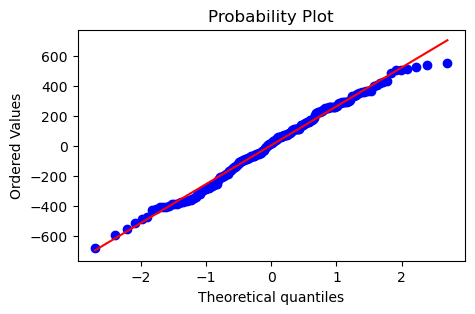

In [72]:
plt.figure(figsize = (5,3))
stats.probplot(residuals, dist = 'norm', plot = pylab)
pylab.show()

##### *Hmmm, looking at the qq plot, the data points diverge at the upper tail which explains why the model is heavily skewed to one side*

#####

### FINAL ANALYSIS
##### * Overall, the model could barely find a relationship between the X and y variables
##### * I suspect that this is due to some X values being totally unrelated to the y variable
##### * I suspect the numerical transformation of the categorical variables may not have been well done

#####

### NEXT STEPS
##### try to perform linear regression on subsets of the X to find any relationship
##### perform shrinkage/regularization to see if the relationship between X and y improves
##### remove some X variables completely from the dataset

#

#

#

#

## LOGISTIC REGRESSION MODEL TO PREDICT IF A STUDENT WILL EXCEED THE BUDGET THRESHOLD

###

##### creating the threshold column

In [108]:
data['budget_threshold'] = [ 1 if value > 1900 else 0 for value in data['total_monthly_spending']]

#####

##### plotting the threshold column

Text(0, 0.5, 'Frequency')

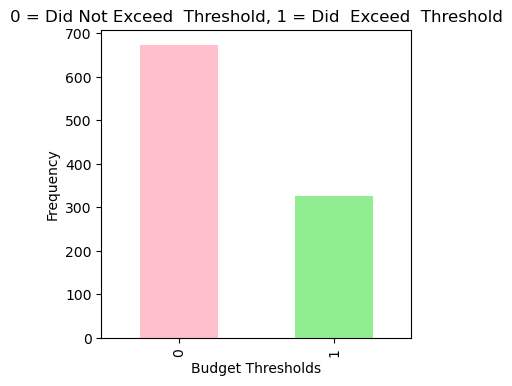

In [118]:
plt.figure(figsize = (4,4))
colors = ['pink', 'lightgreen']
data['budget_threshold'].value_counts().plot(kind = 'bar', color = colors)
plt.title('0 = Did Not Exceed  Threshold, 1 = Did  Exceed  Threshold')
plt.xlabel('Budget Thresholds')
plt.ylabel('Frequency')

#####

##### splitting data into X and y

In [126]:
X = data.drop(columns = ['budget_threshold', 'preferred_payment_method'])
y = data['budget_threshold']

#####

##### normalize the x values to be in the same range

In [127]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [128]:
X_scaled = scaler.fit_transform(X)

In [129]:
X_scaled

array([[-1.73031962, -1.15227087,  1.25903931, ...,  0.25601844,
        -0.70457744, -0.11361338],
       [-1.72685552,  1.00150646,  0.04257621, ...,  0.29636808,
        -0.78093371,  0.2219872 ],
       [-1.72339142,  1.00150646,  1.25903931, ..., -0.04660383,
         0.45985561, -0.15136845],
       ...,
       [ 1.72339142, -0.72151541, -1.17388689, ..., -1.15621882,
        -1.54449637,  0.00804183],
       [ 1.72685552,  0.13999553,  1.25903931, ..., -0.26852683,
        -0.83820091, -0.49116403],
       [ 1.73031962,  1.00150646,  1.25903931, ..., -0.53079946,
         0.68892441,  0.77992316]])

##### split data into test and train

In [131]:
from sklearn import model_selection
trainer = model_selection.train_test_split

In [132]:
X_train, X_test, y_train, y_test = trainer(X_scaled, y, test_size = 0.2, random_state = 100)

#####

##### importing linear model

In [143]:
from sklearn import linear_model

In [144]:
model5 = linear_model.LogisticRegression()

#####

##### training the model and finding predictions

In [145]:
model5.fit(X_train, y_train)

LogisticRegression()

In [146]:
model5.score(X_train, y_train)

0.99375

##### *the logistic regression model has a much higher r-squared compared to the linear regression models from earlier*

In [150]:
predictions = model5.predict(X_test)

#####

##### evaluating the model

In [151]:
from sklearn import metrics

##### accuracy:

In [152]:
scorer = metrics.accuracy_score
accuracy = scorer(y_test, predictions)
print('accuracy of the model is', accuracy)

accuracy of the model is 0.995


##### *the accuracy score of 0.995 means 99.5% of the predictions are correct predictions. which is remarkable*

#####

##### classification report:

In [155]:
reporter = metrics.classification_report
print(f'classification report:\n {reporter(y_test, predictions)}')

classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       138
           1       0.98      1.00      0.99        62

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



#####

##### confusion matrix:

In [158]:
matrix = metrics.confusion_matrix
cm = matrix(y_test, predictions)
print(f'confusion matrix:\n {cm}')

confusion matrix:
 [[137   1]
 [  0  62]]


In [160]:
cm = [[137,1],[0,62]]

#####

##### plotting the confusion matrix of the model

<Axes: >

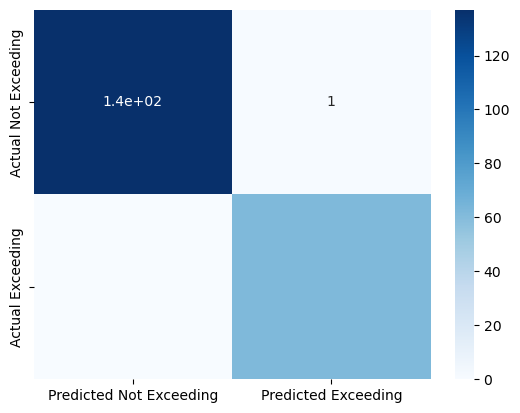

In [173]:
sns.heatmap(cm, annot = True, cmap = "Blues", xticklabels = ['Predicted Not Exceeding', 'Predicted Exceeding'],\
            yticklabels = ['Actual Not Exceeding', 'Actual Exceeding'])
                                              

#####

#### *Judging by the heatmap, the model was very good at predicting if a student would exceed or not exceed their budget based on the training data*

#

#